In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import env
import acquire
import explore

from scipy import stats
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = acquire.get_telco_db('telco_churn', username = env.user, password = env.password, host = env.host)

In [3]:
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,1,1,2,0315-LVCRK,Male,0,No,No,11,Yes,...,No,No,Yes,No,84.80,888.75,No,Fiber optic,Month-to-month,Electronic check
1,1,1,2,0318-QUUOB,Male,0,Yes,No,1,Yes,...,No,Yes,No,Yes,80.55,80.55,Yes,Fiber optic,Month-to-month,Electronic check
2,1,1,2,0320-JDNQG,Male,0,Yes,Yes,23,Yes,...,Yes,Yes,Yes,Yes,99.85,2331.3,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0324-BRPCJ,Female,1,Yes,No,68,Yes,...,No,Yes,Yes,Yes,100.20,6851.65,Yes,Fiber optic,Month-to-month,Electronic check
4,1,1,2,0325-XBFAC,Male,0,No,No,8,Yes,...,No,Yes,Yes,Yes,94.70,740.3,Yes,Fiber optic,Month-to-month,Electronic check


### Splitting data into train, validate, test

In [4]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [5]:
train, validate, test = train_validate_test_split(df, target='churn', seed=123)

In [6]:
train.columns

Index(['payment_type_id', 'contract_type_id', 'internet_service_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type', 'contract_type',
       'payment_type'],
      dtype='object')

### Plot Variable Pairs

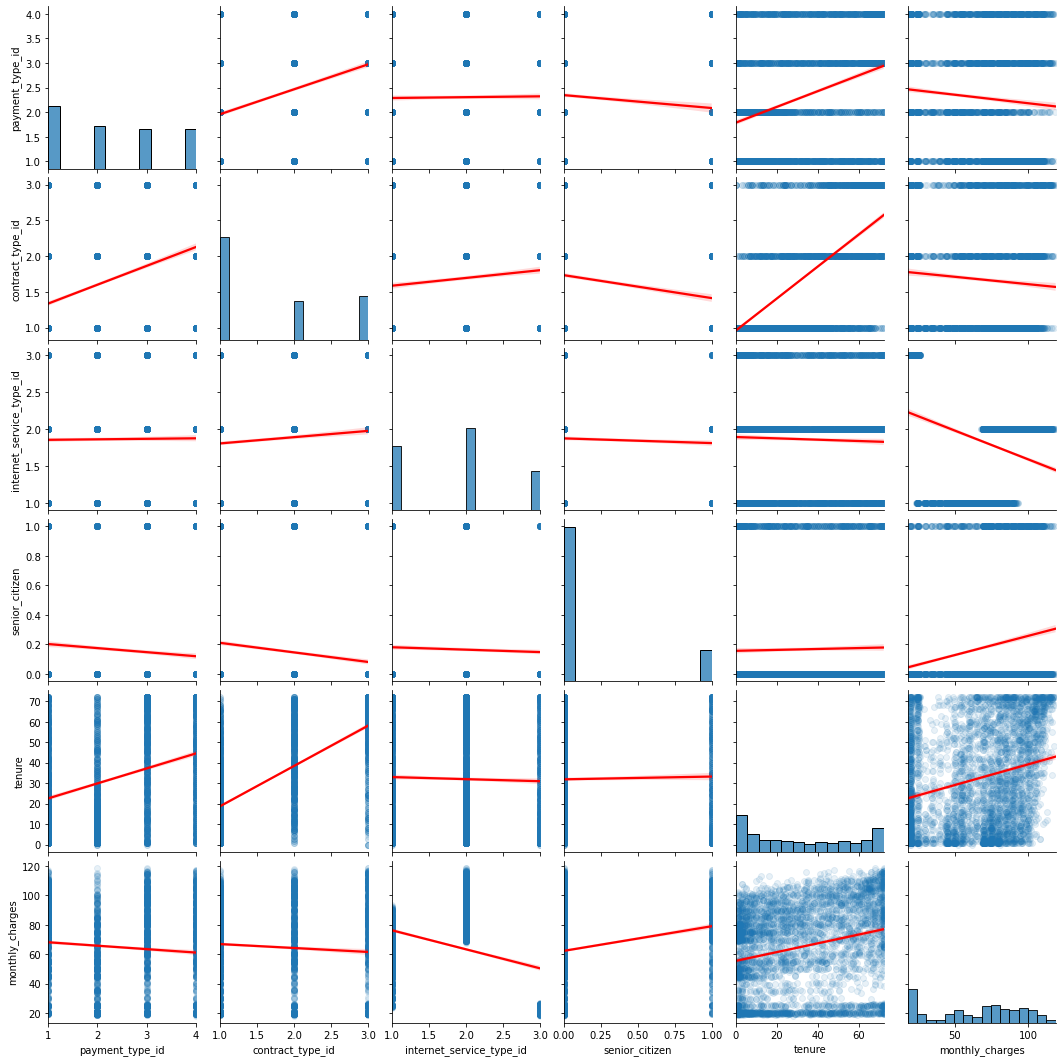

In [7]:
explore.plot_variable_pairs(train,train.columns)

##### Dropping columns I think aren't necessary

In [8]:
train = train.drop(['customer_id','payment_type_id','contract_type_id','internet_service_type_id','online_backup','device_protection','tech_support','streaming_tv','streaming_movies'], axis = 1)

In [9]:
train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'internet_service_type', 'contract_type', 'payment_type'],
      dtype='object')

In [10]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
5717,Female,0,Yes,Yes,72,Yes,Yes,No internet service,No,25.20,1787.35,No,None,Two year,Bank transfer (automatic)
4276,Male,0,No,Yes,3,Yes,No,No internet service,Yes,20.05,75.45,No,None,Month-to-month,Mailed check
4903,Female,0,No,No,27,Yes,No,No,Yes,56.15,1439.35,No,DSL,Month-to-month,Mailed check
2748,Male,1,No,No,18,Yes,Yes,Yes,Yes,58.40,964.9,No,DSL,Month-to-month,Credit card (automatic)
3255,Male,0,Yes,Yes,57,Yes,Yes,No,Yes,74.30,4018.35,No,Fiber optic,Month-to-month,Electronic check


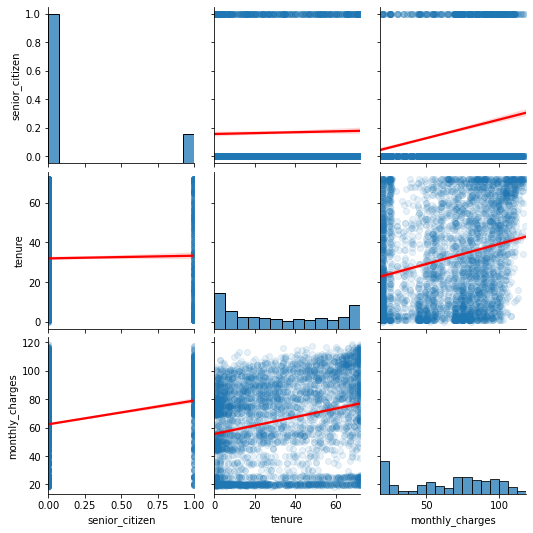

In [11]:
explore.plot_variable_pairs(train,train.columns)

### Convert months to years

In [12]:
explore.months_to_years(train)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,tenure_years
5717,Female,0,Yes,Yes,72,Yes,Yes,No internet service,No,25.20,1787.35,No,None,Two year,Bank transfer (automatic),6
4276,Male,0,No,Yes,3,Yes,No,No internet service,Yes,20.05,75.45,No,None,Month-to-month,Mailed check,0
4903,Female,0,No,No,27,Yes,No,No,Yes,56.15,1439.35,No,DSL,Month-to-month,Mailed check,2
2748,Male,1,No,No,18,Yes,Yes,Yes,Yes,58.40,964.9,No,DSL,Month-to-month,Credit card (automatic),1
3255,Male,0,Yes,Yes,57,Yes,Yes,No,Yes,74.30,4018.35,No,Fiber optic,Month-to-month,Electronic check,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,Female,1,No,No,30,No,No phone service,No,Yes,40.30,1172.95,Yes,DSL,Month-to-month,Electronic check,2
637,Male,1,Yes,No,29,Yes,Yes,No,Yes,84.30,2357.75,No,Fiber optic,Month-to-month,Electronic check,2
1013,Male,0,Yes,No,1,No,No phone service,No,Yes,23.45,23.45,Yes,DSL,Month-to-month,Electronic check,0
4067,Male,0,No,No,1,Yes,No,No internet service,No,20.65,20.65,No,None,Month-to-month,Electronic check,0


### Plot categorical and continuous variables

In [13]:
continuous_var = df['monthly_charges']
categorical_var = df['contract_type']

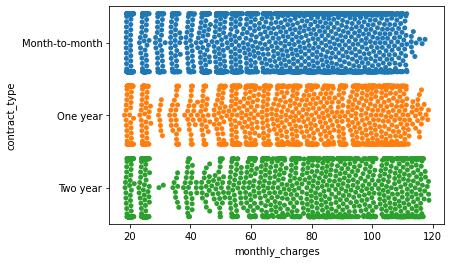

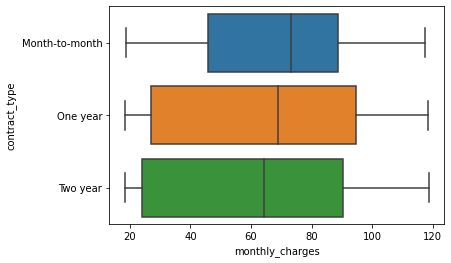

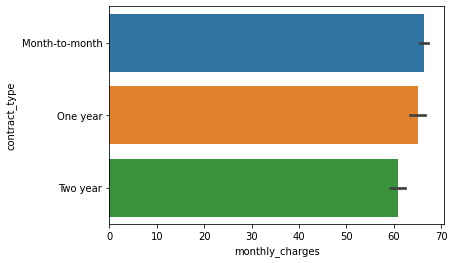

In [14]:
explore.plot_categorical_and_continuous_vars(train, continuous_var, categorical_var)